## **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import requests
import datetime

## **Loading dataset**

In [ ]:
df = pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.shape

(2035, 8)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

## **Lets see the missing values**

In [ ]:
missing = df.isnull().sum()


In [ ]:
print(missing)

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


### **No missing values**

## **Data Visualisation**

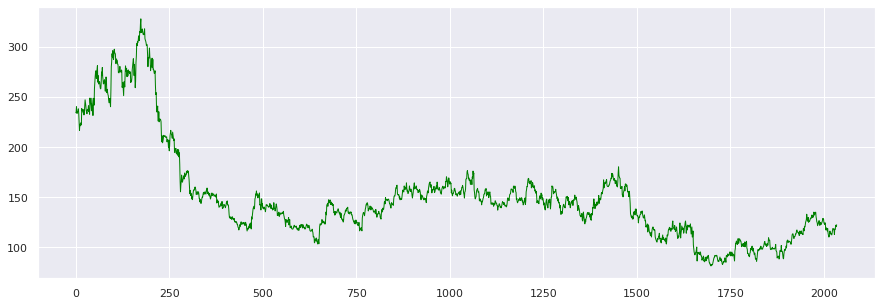

In [ ]:
sns.set(rc = {'figure.figsize': (15, 5)})
df['Open'].plot(linewidth = 1,color='green')

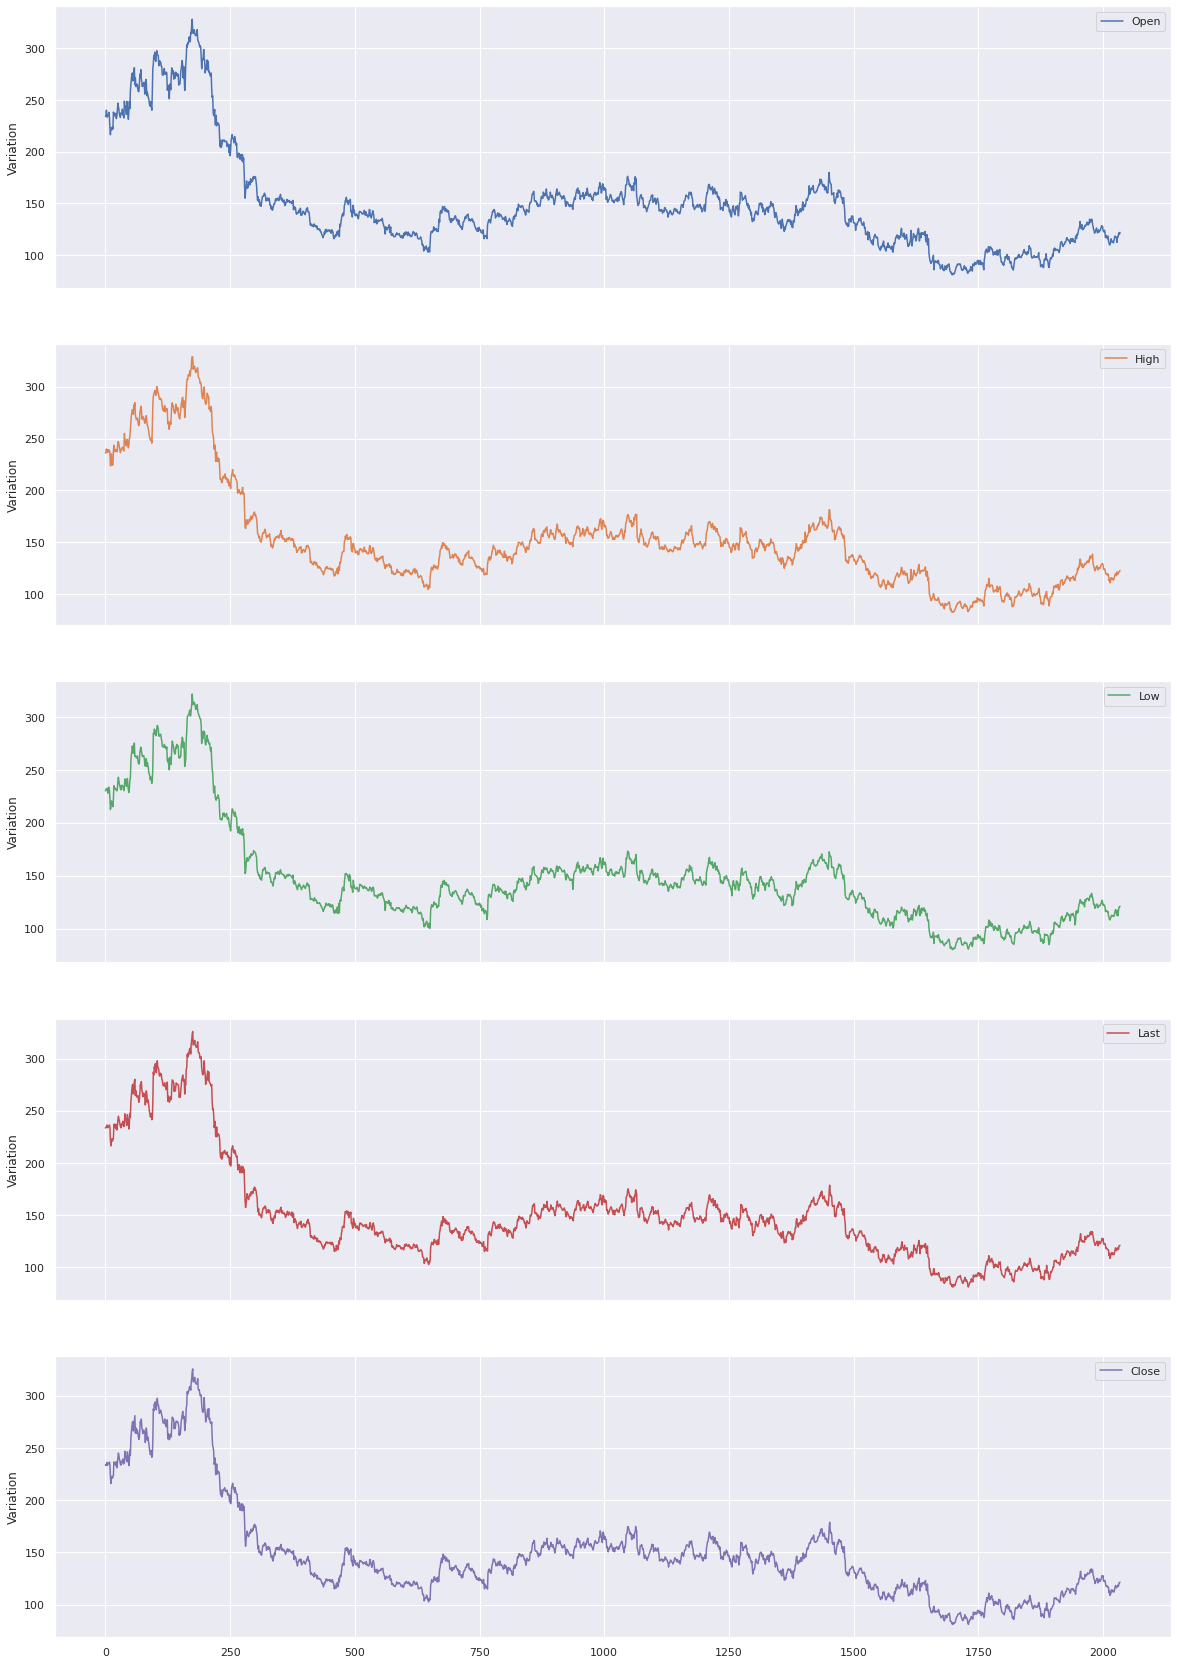

In [ ]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

In [ ]:
df1 = df.reset_index()['Close']

In [ ]:

df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

### **LSTM is sensitive to scale of data so we use minmax scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
df1 = scale.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(2035, 1)

### **splitting into train test**

In [ ]:
training = int(len(df1)*0.65)
training

1322

In [ ]:
testing = len(df1) - training
testing

713

In [ ]:
train_data, test_data = df1[0:training,:],df1[training:len(df1),:1]

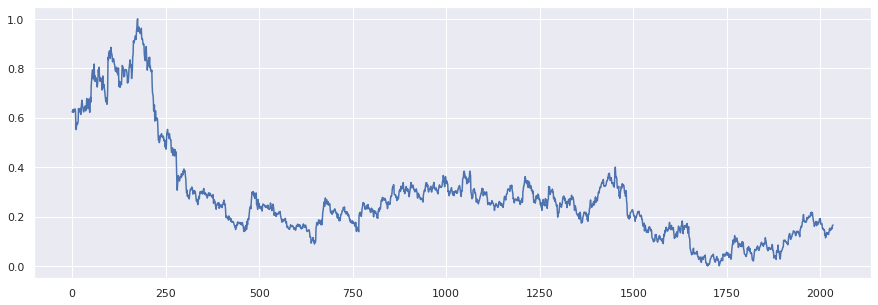

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

### **an array of values into a dataset matrix**

In [ ]:
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 100
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [ ]:
trainX = trainX.reshape(trainX.shape[0],trainX.shape[1],1)
testX = testX.reshape(testX.shape[0],testX.shape[1],1)

### **Create the Stacked LSTM model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY,validation_data = (testX,testY), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.8422 - val_loss: 0.0864
Epoch 2/100
1/1 [==============================] - 0s 139ms/step - loss: 0.6812 - val_loss: 0.0591
Epoch 3/100
1/1 [==============================] - 0s 157ms/step - loss: 0.5311 - val_loss: 0.0336
Epoch 4/100
1/1 [==============================] - 0s 153ms/step - loss: 0.3770 - val_loss: 0.0117
Epoch 5/100
1/1 [==============================] - 0s 148ms/step - loss: 0.2187 - val_loss: 7.1904e-05
Epoch 6/100
1/1 [==============================] - 0s 154ms/step - loss: 0.0761 - val_loss: 0.0157
Epoch 7/100
1/1 [==============================] - 0s 150ms/step - loss: 7.9022e-04 - val_loss: 0.0821
Epoch 8/100
1/1 [==============================] - 0s 166ms/step - loss: 0.0584 - val_loss: 0.1376
Epoch 9/100
1/1 [==============================] - 0s 155ms/step - loss: 0.1185 - val_loss: 0.1366
Epoch 10/100
1/1 [==============================] - 0s 153ms/step - loss: 0.0984 - val_loss: 0.1043
Epoc

## **Importing tensorflow**

In [ ]:
import tensorflow as tf


### **performance metrics**

In [ ]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

1/1 [==============================] - 0s 38ms/step


### **Transformback to original form**

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### **RMSE performance metrics**

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(trainY,train_predict))

0.00024243234808918324

In [ ]:
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

### **Test Data RMSE**

In [ ]:
math.sqrt(mean_squared_error(testY,test_predict))

0.27922958447263135

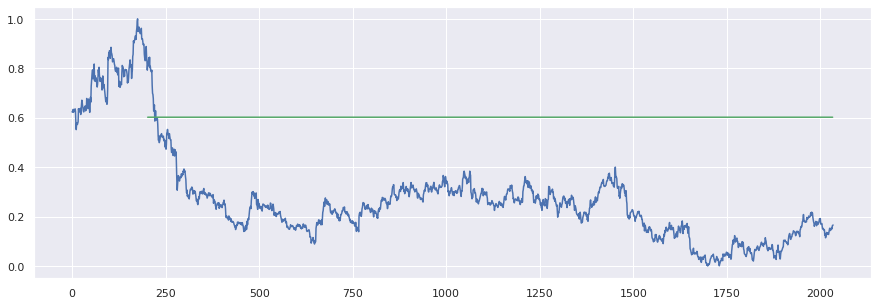

In [ ]:
import numpy as np
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()